In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [4]:
df.shape

(202, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [6]:
df.select_dtypes(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,160,5300
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,3.58,2.87,134,5500
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,3.01,3.4,106,4800
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,3.78,3.15,114,5400


In [7]:
# concat object columns that are numeric in nature and columns with numeric values into cols
cols = ['bore','stroke','horsepower','peak-rpm'] + list(df.select_dtypes(include=['float64', 'int64']).columns)
cols

['bore',
 'stroke',
 'horsepower',
 'peak-rpm',
 'symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price']

In [8]:
#convert columns in cols to numeric  values (it will generate  null  values in case of unknown/? values)
df[cols] = df[cols].apply(lambda col: pd.to_numeric(col, errors='coerce'))

In [9]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

# Handle missing values for numeric values


In [10]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col:col.fillna(col.mean()))

#for col in numeric_cols:
    #df[col] = df[col].fillna(df[col].mean())

# Handle missing values for categorical values

In [11]:

df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3268\1191288004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)


In [12]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,121.836364,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,121.836364,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


# some graphical view

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

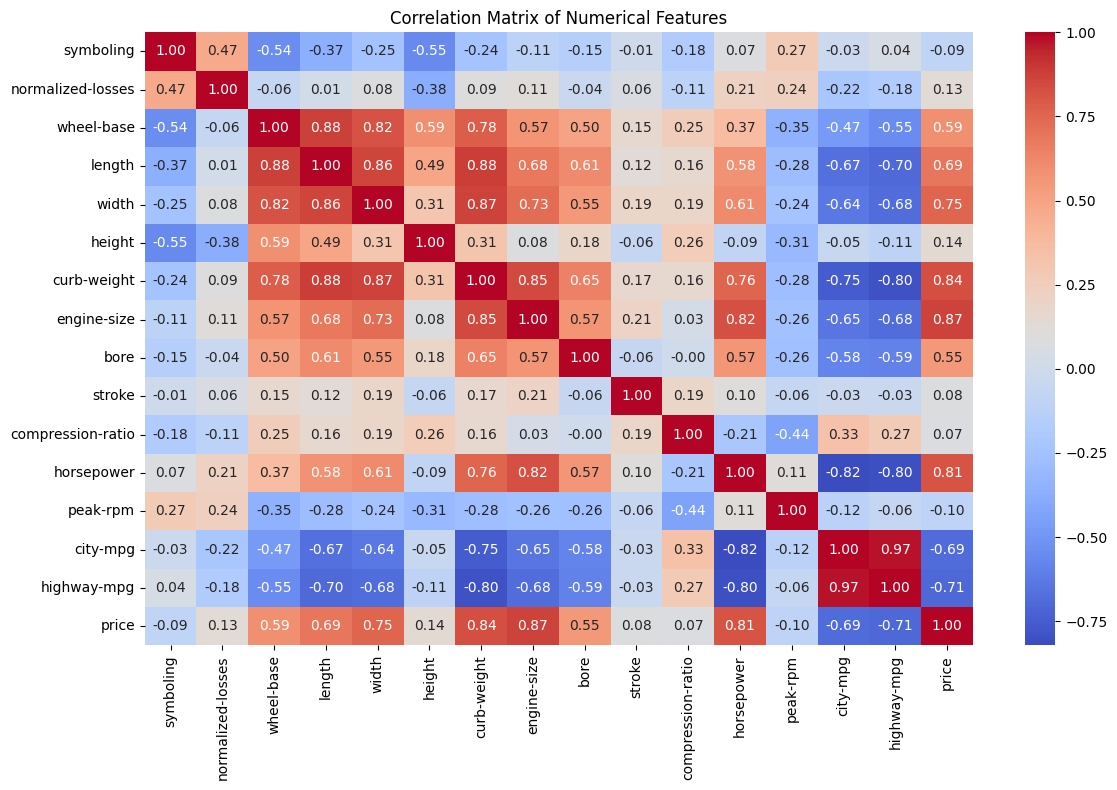

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

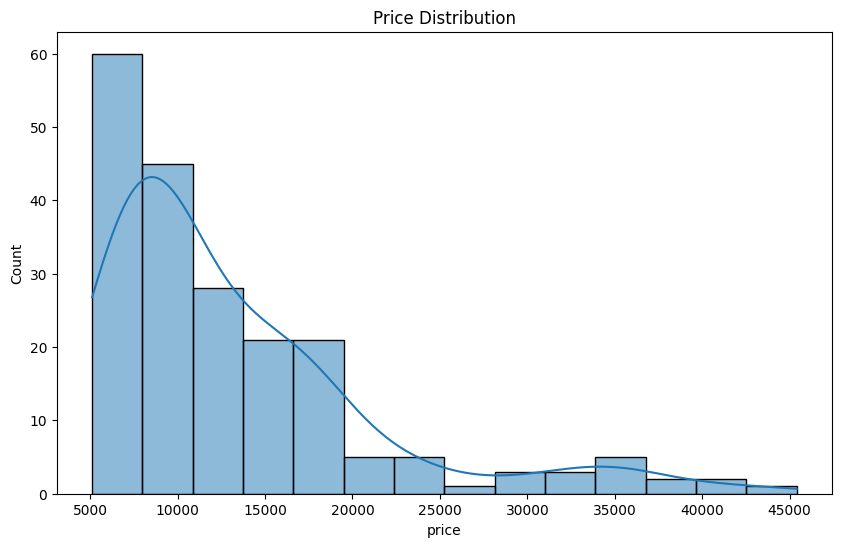

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

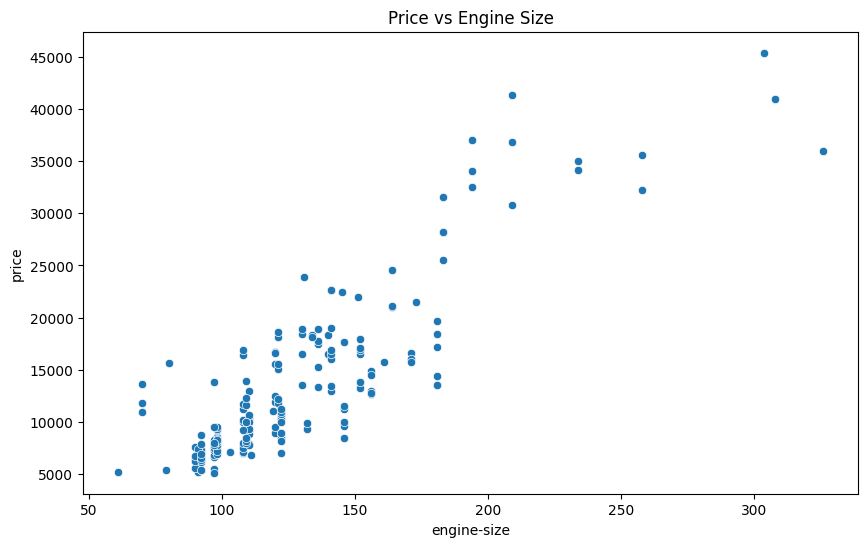

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engine-size', y='price')
plt.title('Price vs Engine Size')
plt.show()

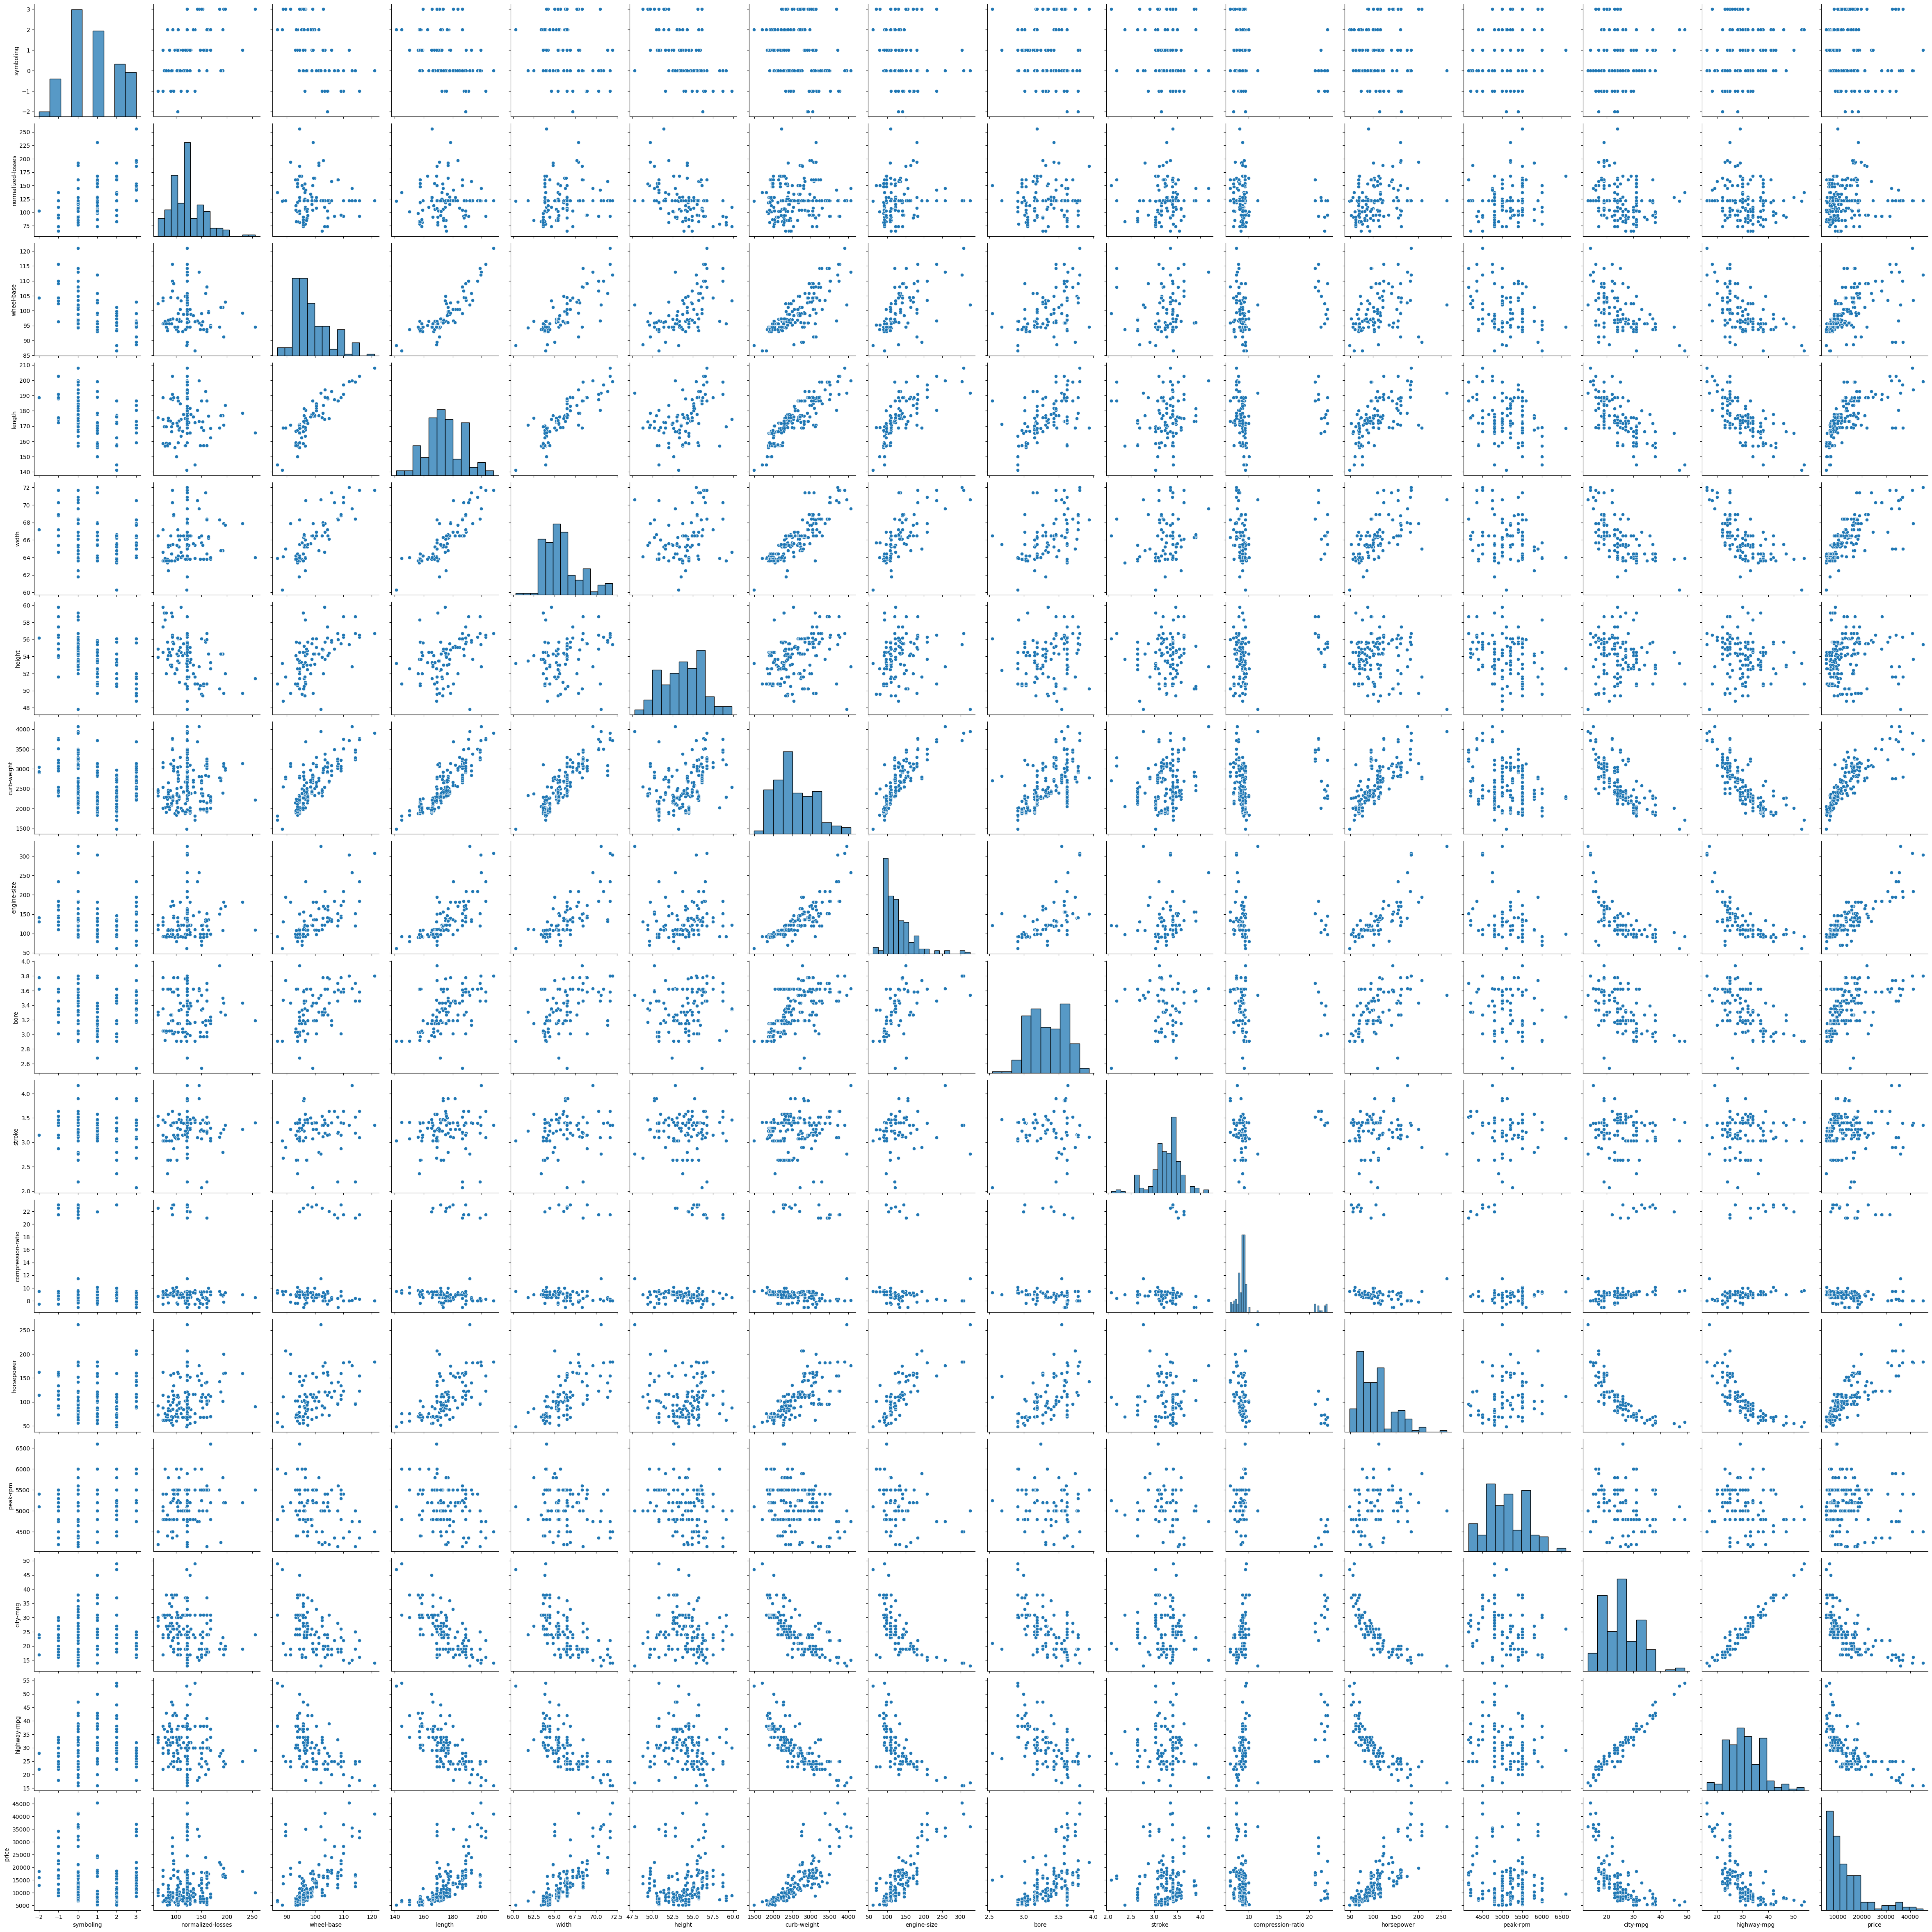

In [18]:
sns.pairplot(data=df[numeric_cols],height=3)
plt.show()

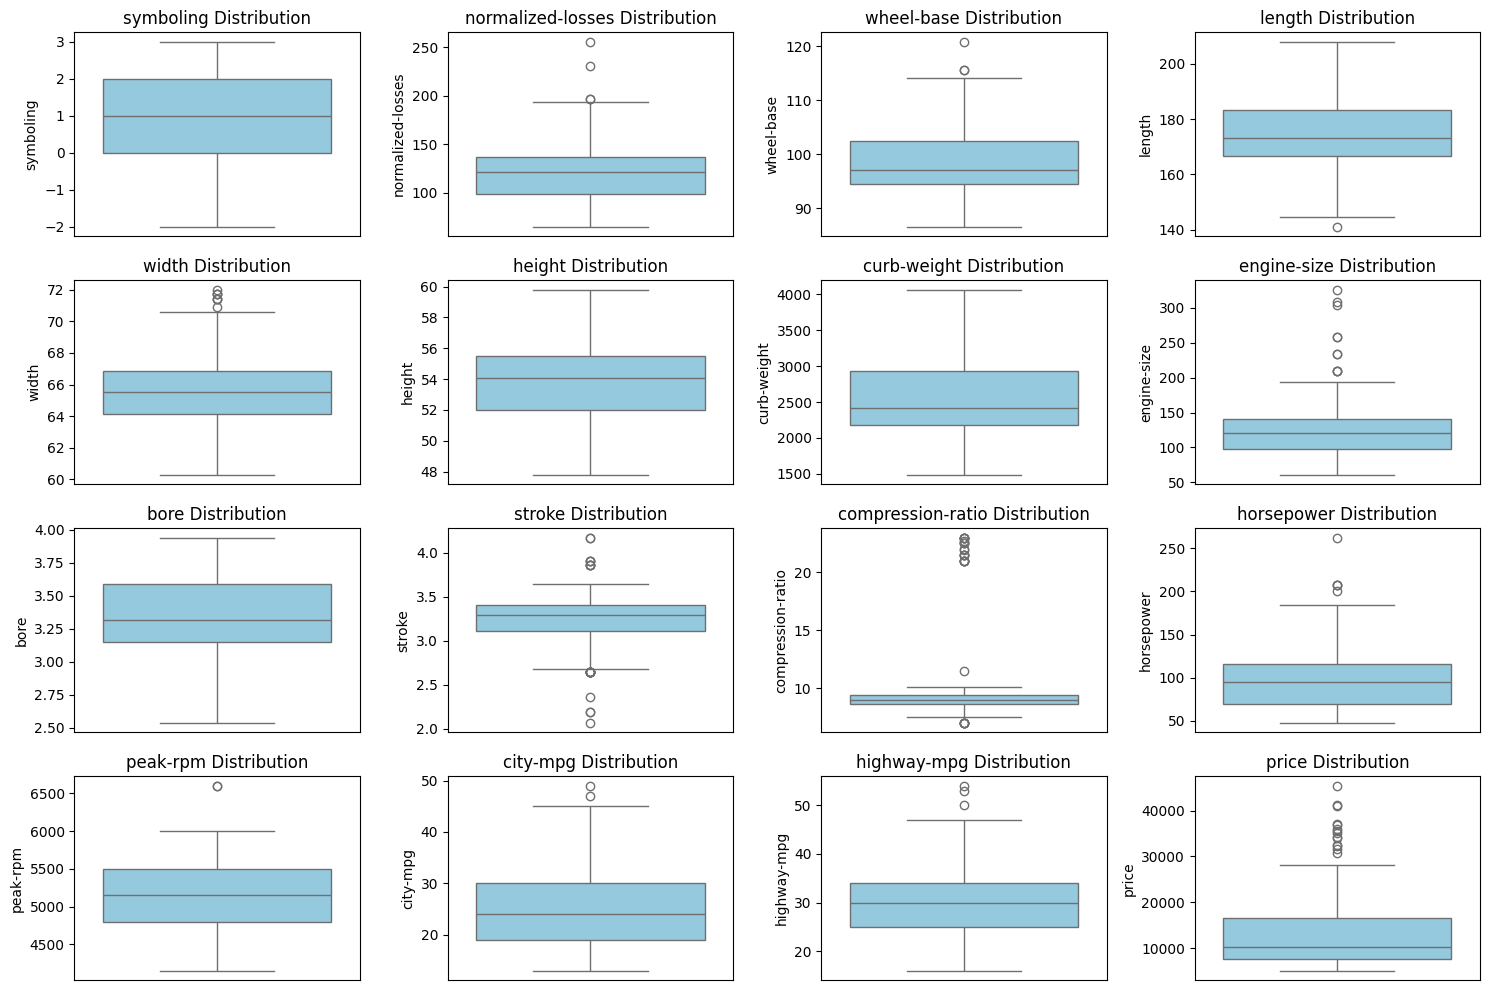

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols, 1):
    plt.subplot(4,4, i)
    sns.boxplot(y=df[feature], color='skyblue')
    plt.title(f'{feature} Distribution')
    plt.xticks([])

plt.tight_layout()
plt.show()

In [20]:
categorical_cols = df.drop(numeric_cols, axis=1)
categorical_cols

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
197,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
198,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
199,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi
200,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi


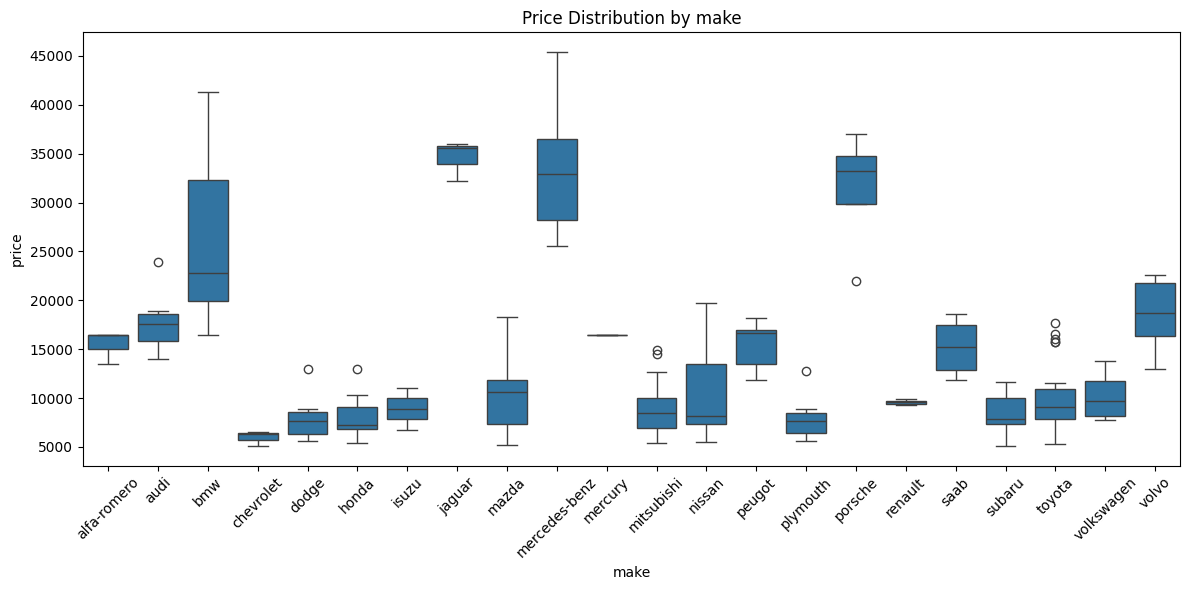

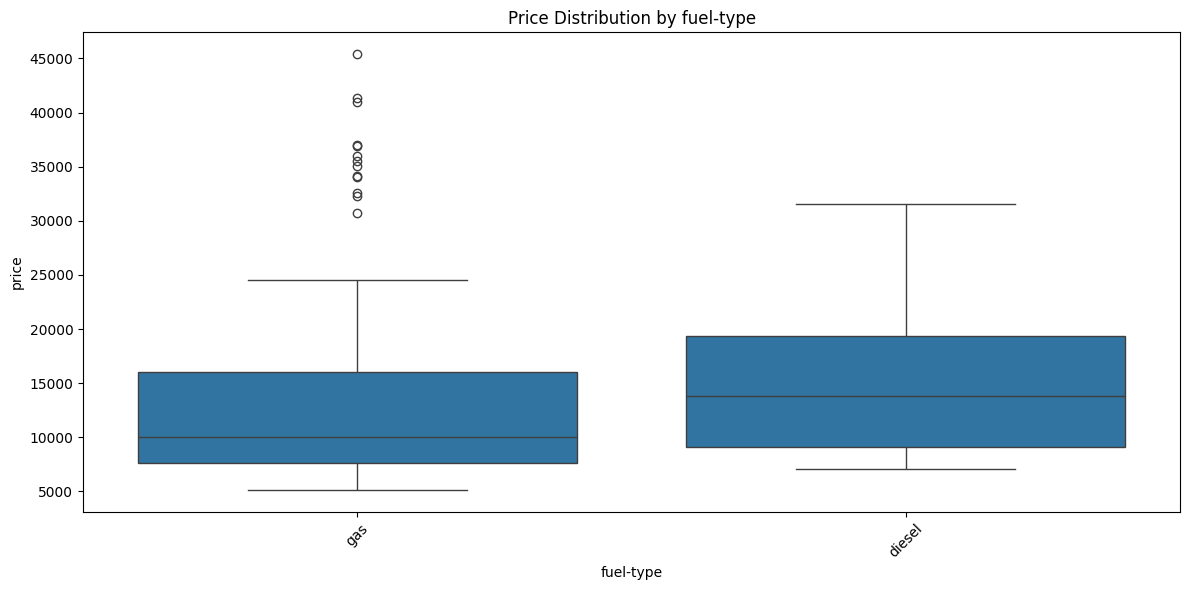

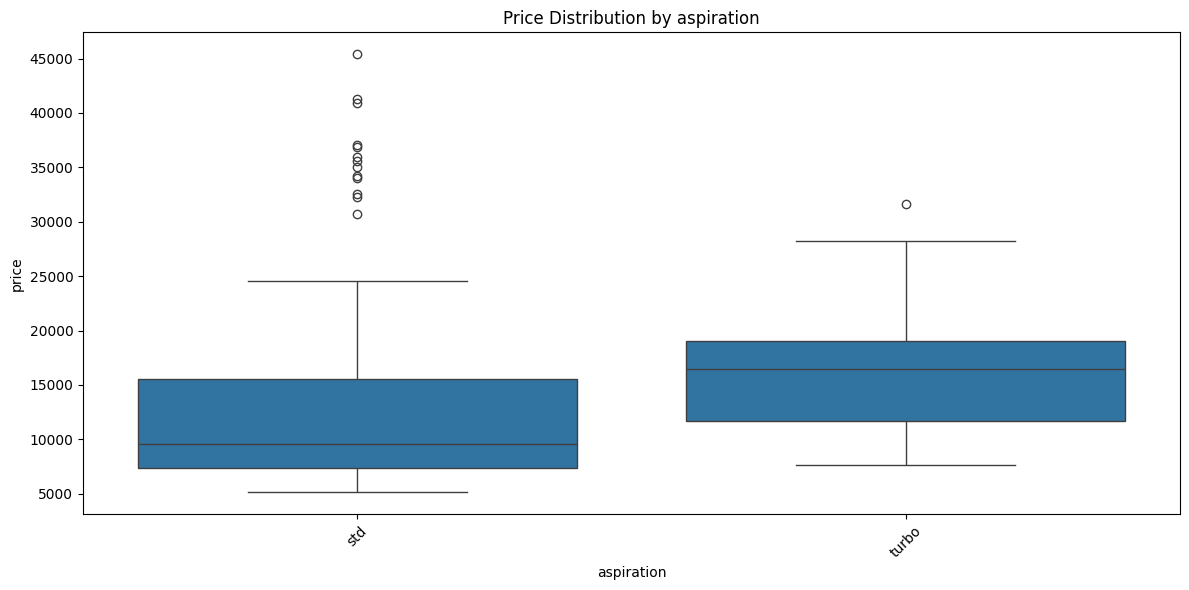

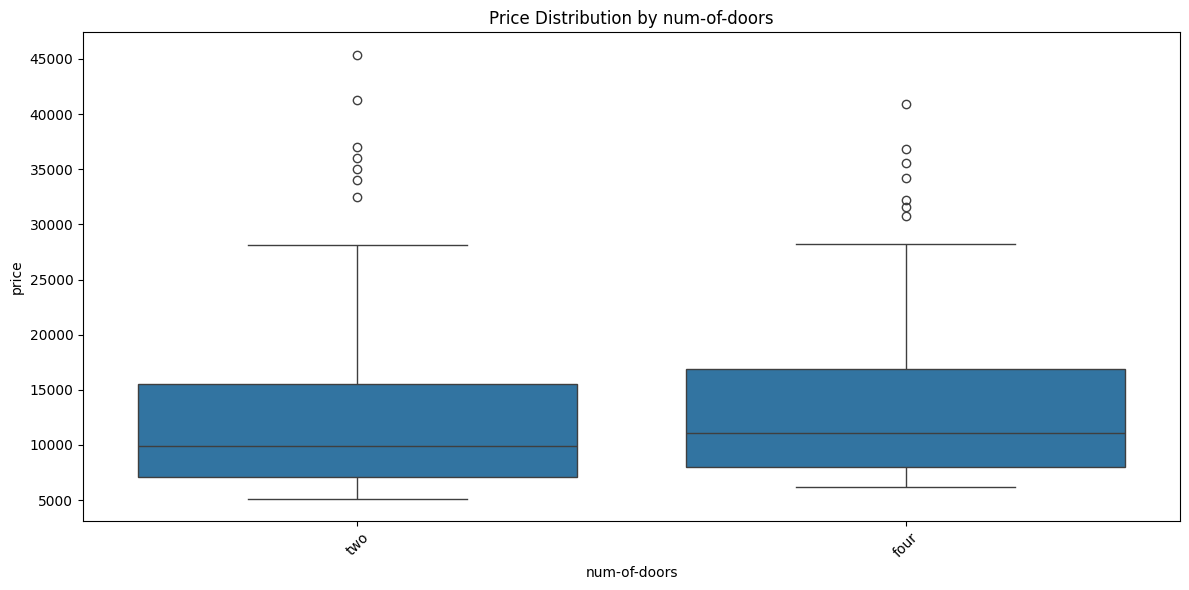

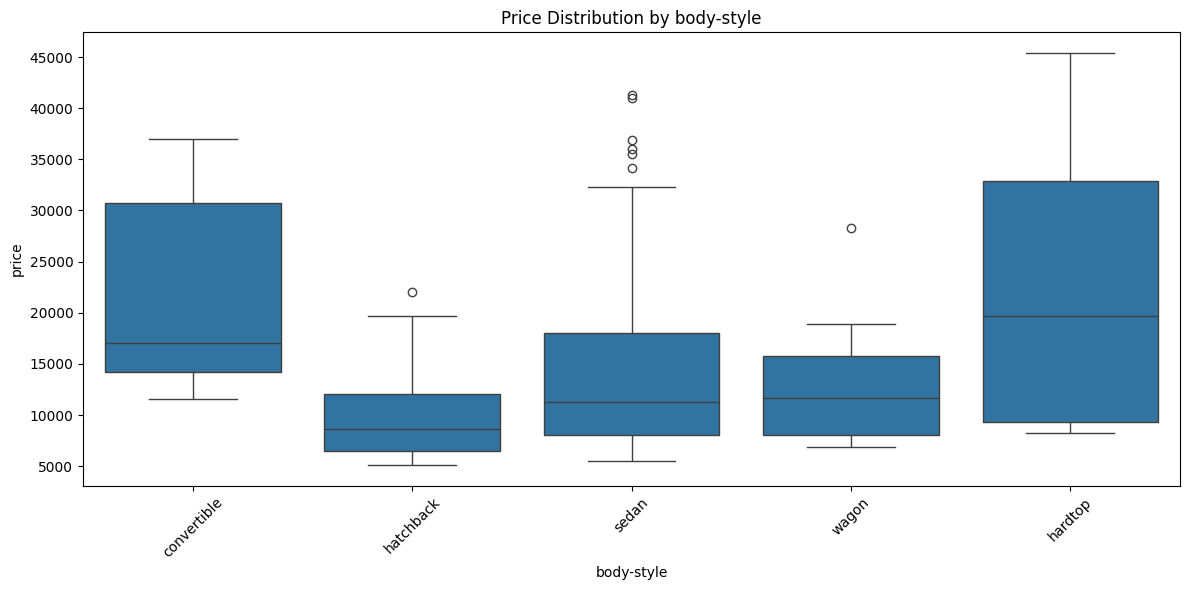

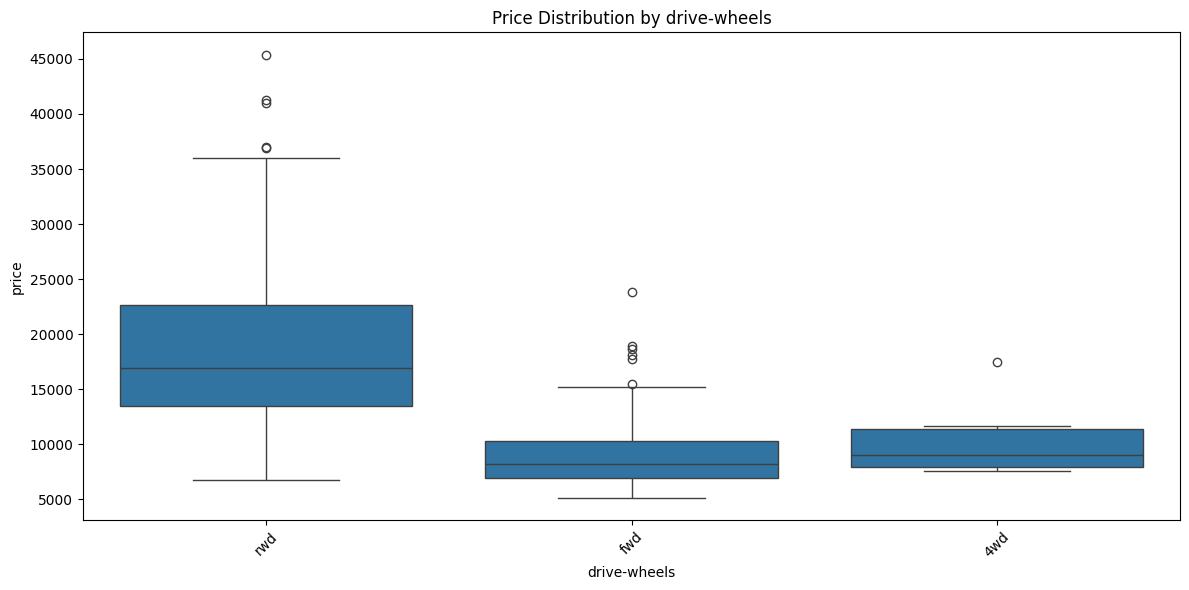

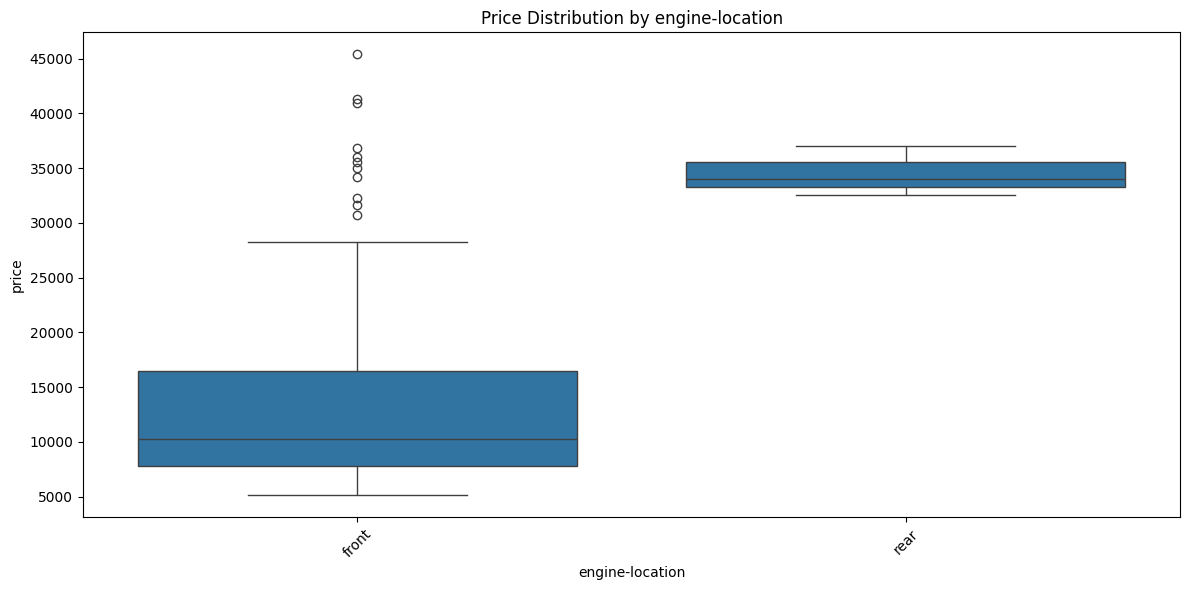

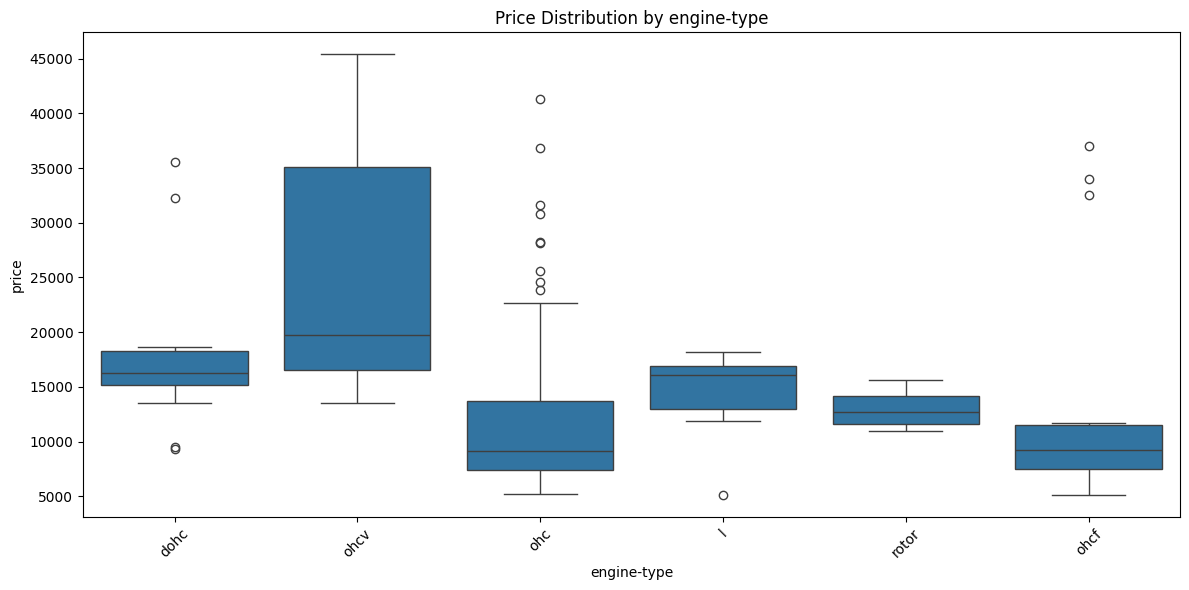

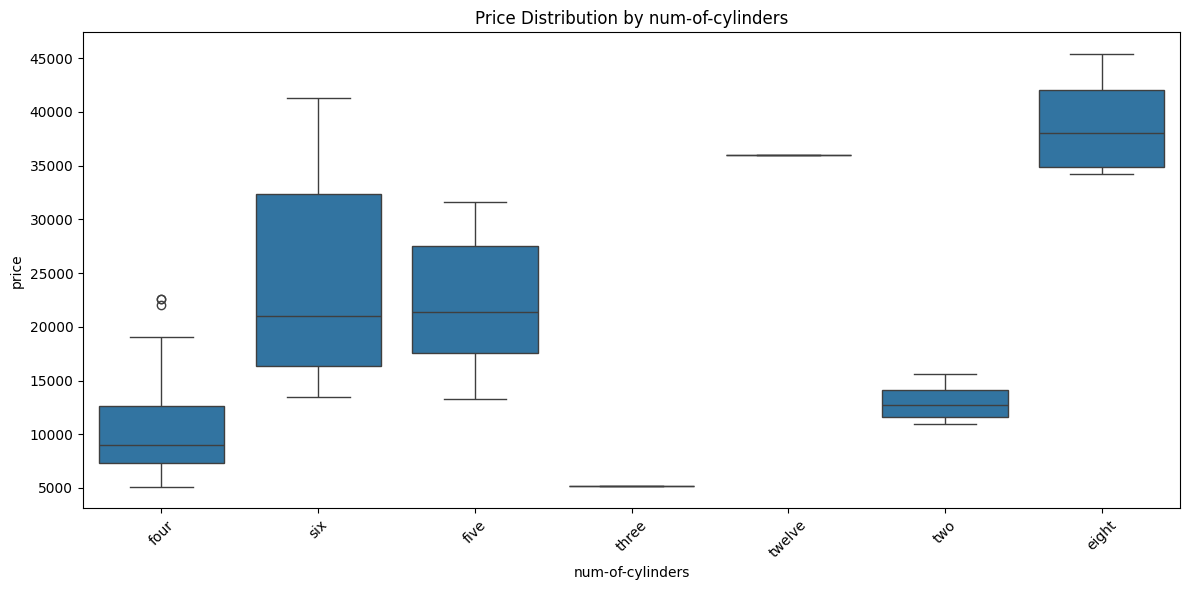

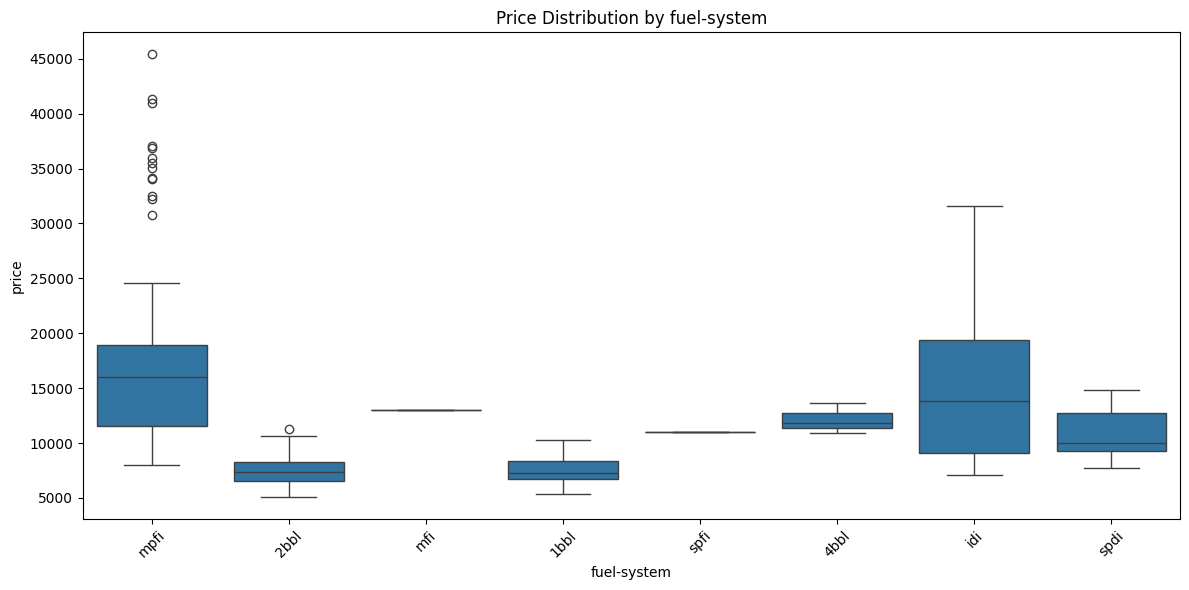

In [21]:
for feature in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Price Distribution by {feature}')
    plt.tight_layout()
    plt.show()

# LabelEncoder()

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [23]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.836364,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,121.836364,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,121.836364,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.000000,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.000000,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [25]:
#Power-to-Weight Ratio
df['power_to_weight'] = df['horsepower'] / df['curb-weight']
#Price-to-Engine Size Ratio 
df['price_to_engine_size'] = df['price'] / df['engine-size']
#Vehicle Dimensions (Length x Width x Height)
df['vehicle_dimensions'] = df['length'] * df['width'] * df['height']
# Weight-to-Length Ratio
df['weight_to_length'] = df['curb-weight'] / df['length']

In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'power_to_weight', 'price_to_engine_size',
       'vehicle_dimensions', 'weight_to_length'],
      dtype='object')

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,power_to_weight,price_to_engine_size,vehicle_dimensions,weight_to_length
0,3,121.836364,0,1,0,1,0,2,0,88.6,...,9.0,111.0,5000.0,21,27,13495,0.043564,103.807692,528019.904,15.094787
1,3,121.836364,0,1,0,1,0,2,0,88.6,...,9.0,111.0,5000.0,21,27,16500,0.043564,126.923077,528019.904,15.094787
2,1,121.836364,0,1,0,1,2,2,0,94.5,...,9.0,154.0,5000.0,19,26,16500,0.054552,108.552632,587592.640,16.489486
3,2,164.000000,1,1,0,0,3,1,0,99.8,...,10.0,102.0,5500.0,24,30,13950,0.043646,127.981651,634816.956,13.233296
4,2,164.000000,1,1,0,0,3,0,0,99.4,...,8.0,115.0,5500.0,18,22,17450,0.040722,128.308824,636734.832,15.990940


In [28]:
X = df.drop('price', axis=1)
y = df['price']

# split data for train and test

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    


# apply LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [33]:
y_LR_pred = LR.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
LR_mse = mean_squared_error(y_test, y_LR_pred)
LR_mse

1749717.5022863394

In [36]:
LR_r2 = r2_score(y_test, y_LR_pred)
LR_r2

0.9847749302208813

# apply KNN Regressor

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn_reg = KNeighborsRegressor(n_neighbors=5)


In [39]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [40]:
y_knn_reg_pred = knn_reg.predict(X_test)

In [41]:
knn_reg_mse = mean_squared_error(y_test, y_knn_reg_pred)
knn_reg_mse

52487817.91121951

In [42]:
knn_reg_r2 = r2_score(y_test, y_knn_reg_pred)
knn_reg_r2

0.5432801642506419